<a href="https://colab.research.google.com/github/abderrahimJK/abderrahimJK/blob/main/VNS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
!git init

Initialized empty Git repository in /content/.git/


In [1]:
import numpy as np
from random import shuffle
import random
import itertools

# to plot
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [2]:
def swap_cities(solution):
  size = len(solution)
  city_a, city_b = np.random.randint(0, size, 2)
  new_solution = solution.copy()
  new_solution[city_a], new_solution[city_b] = new_solution[city_b], new_solution[city_a]

  return new_solution


def insert_city(solution):
  size = len(solution)
  new_solution = solution.copy()
  city_to_insert = np.random.randint(0, size)
  if city_to_insert not in new_solution:
    insert_indx = np.random.randint(0, size)
    new_solution.insert(insert_indx, city_to_insert)

  return new_solution
  

def reverse_subsequence(solution):
  n = len(solution)
  a = np.random.randint(0, n)
  b = np.random.randint(0, n)
  if a > b:
      a, b = b, a
  new_solution = solution[:a] + solution[a:b+1][::-1] + solution[b+1:]
  return new_solution


In [3]:
def VNS_TSP(cities, initial_solution, max_iter):
  best_solution = initial_solution
  k = 1
  iteration = 0
  while iteration<max_iter :
    random_solution = shake(best_solution , k)
    if len(random_solution) < len(best_solution):
      best_solution = random_solution
      k=1
    else:
      k = k+1
    iteration+=1
    return best_solution

def shake(solution, k):
  if k == 1:
    new_solution = swap_cities(solution)
  elif k==2:
    new_solution = insert_city(solution)
  else:
    new_solution = reverse_subsequence(solution)
  return new_solution


In [4]:
def get_initial_solution(cities):
  size = len(cities)
  initial_solution = list(range(size))
  shuffle(initial_solution)
  return initial_solution

def plot_solution(cities, solution):
    x = [cities[i][0] for i in solution]
    y = [cities[i][1] for i in solution]
    x.append(x[0])
    y.append(y[0])
    plt.plot(x, y, '-o')
    plt.show()


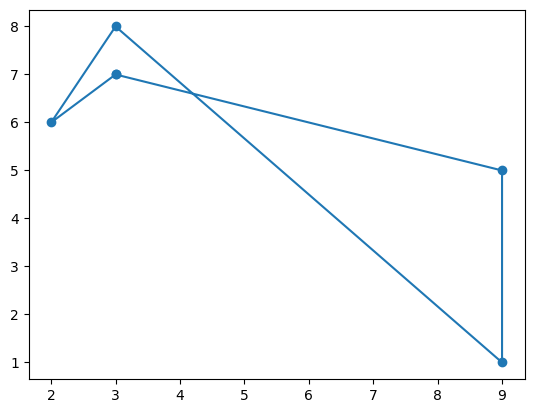

In [5]:

cities  = [(9, 1), (3, 7), (9, 5), (2, 6), (3, 8)]
initial_solution = get_initial_solution(cities)
best_solution = VNS_TSP(cities,initial_solution, 2)
plot_solution(cities, best_solution)